# Introduction to image processing
### Don't forget, this is the beginning...
Some cells are based on [OpenCV-Python Tutorial]

In [1]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [47]:
img = cv2.imread('./datasets/images/messi.jpg', cv2.IMREAD_COLOR)

# If the image path is wrong, the resulting img will be none
if img is None:
    print('Open Error')
else:
    print('Image Loaded')

Image Loaded


In [48]:
# Check the resulting img
print(type(img))
print(img.shape)
print(img.dtype)
print(img[:2, :2, :])  # Right-upper-most few pixels of the image

<class 'numpy.ndarray'>
(342, 548, 3)
uint8
[[[39 43 44]
  [42 46 47]]

 [[37 40 44]
  [42 45 49]]]


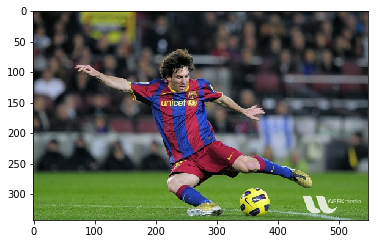

In [49]:
# display an image using matplotlib
# plt.imshow(img) # => The color of this line is wrong
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Basic operations on Images
## 1. Draw an object

- `cv2.line(image, startPoint, endPoint, rgb, thinkness)`
- `cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)`
- `cv2.circle(image, center, radius, rgb, thinkness)`
- `cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)`

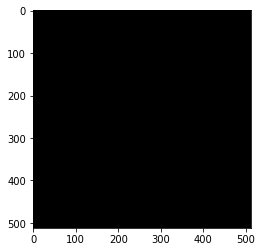

In [65]:
# Create a black image
img2 = np.zeros((512,512,3), np.uint8)
# img2[:,:,2] = 100
plt.imshow(img2)

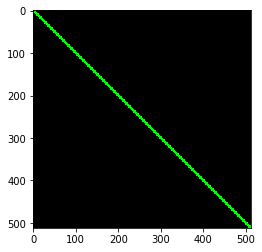

In [67]:
# Draw a line using cv2.line(image, startPoint, endPoint, rgb, thinkness)
cv2.line(img2, (0,0), (511,511), (0,255,0), 5)
# => Diagonal red line with thickness of 5 px
plt.imshow(img2)

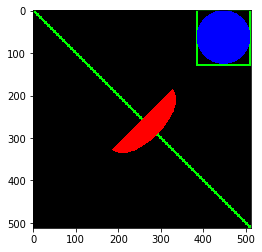

In [68]:
# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv2.rectangle(img2, (384,0), (510,128), (0,255,0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv2.circle(img2, (447,63), 63, (0,0,255), -1)
# => Blue filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv2.ellipse(img2, (256,256), (100,50), -45, 0, 180, (255,0,0), -1)
# => Red wide down-half ellipse

plt.imshow(img2)

[[[ 10  10]]

 [[150 200]]

 [[300 150]]

 [[200  50]]]


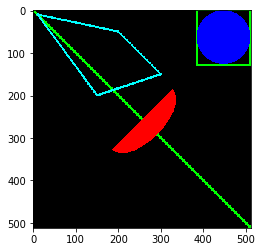

In [69]:
# Draw a line using cv2.polylines(image, points, isClosed, rgb, thinkness, lineType, shift)
pts = np.array([[10,10],[150,200],[300,150],[200,50]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img2,[pts],True,(0,255,255),3)
# => Cyan closed quadrangle 

print(pts)
plt.imshow(img2)

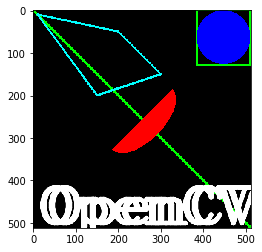

In [71]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img2, 'OpenCV', (30,500), font, 4, (255,255,255), 10, cv2.LINE_AA)
# => White 'OpenCV' text at the bottom

plt.imshow(img2)

In [72]:
# Access a pixel value(BGR order)
img[50, 235]

array([29, 24, 25], dtype=uint8)

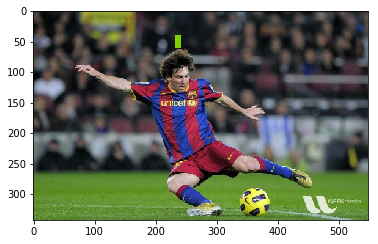

In [77]:
# Change pixel values
img[40:60, 233:242] = (0, 208, 128)
# => Green dot above messi's head

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

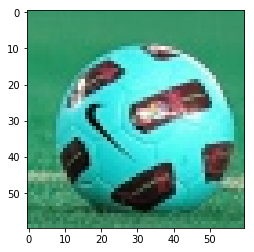

In [78]:
plt.imshow(img[280:340, 330:390])

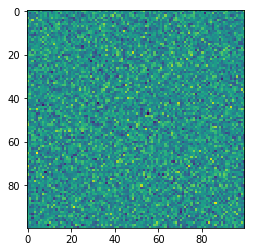

In [80]:
plt.imshow(np.random.normal(0,1,(100,100)))

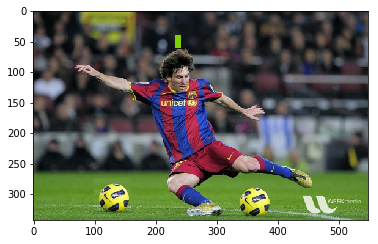

In [79]:
# ROI is obtained using Numpy indexing 
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

# img[50:55, 235:240] = (0, 255, 0)  # The for-loop in the code block above is equavalent to this line. 

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

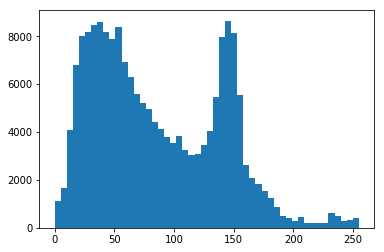

In [99]:
plt.hist(img[:,:,1].reshape(-1),50);

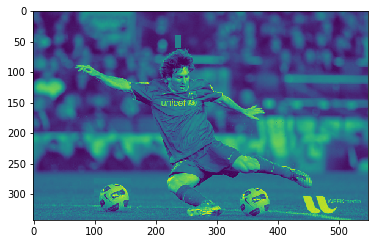

In [112]:
new_img = np.mean(img,axis=2)
plt.imshow(new_img)

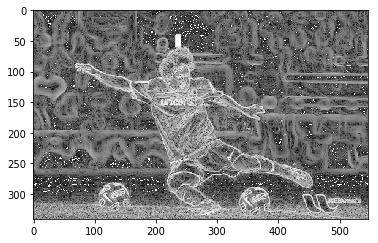

In [113]:
dx = np.diff(new_img,axis=0)
dy = np.diff(new_img,axis=1)
dimg = (dx[:,:-1])**2+(dy[:-1,:])**2
plt.imshow(dimg,'gray',norm=LogNorm())

# Convolution

In [147]:
from scipy import signal
from scipy import misc
img = cv2.imread('datasets/images/logo.jpg').mean(axis=2)

scharr = np.array([[ -3, 0,  +3 ],
                   [-10, 0, +10],
                   [ -3, 0,  +3]]) # Gx + j*Gy
img.shape, scharr.shape

((260, 462), (3, 3))

In [149]:
grad = signal.convolve2d(img, scharr, boundary='symm', mode='same')

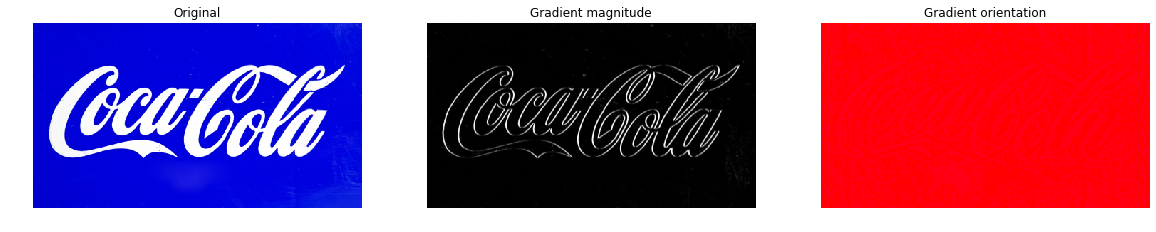

In [151]:
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(1, 3,figsize=(20,7))
ax_orig.imshow(lena, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()

# Edge Detection

dtype: uint8
shape: (298, 299)


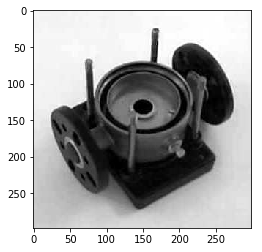

In [107]:
# Load an image into grayscale
input_image = cv2.imread('datasets/images/wheel.png', cv2.IMREAD_GRAYSCALE)  # input_image: 2-dim array
print('dtype: ' + str(input_image.dtype))
print('shape: ' + str(input_image.shape))

plt.imshow(input_image, cmap='gray')  # Make sure that the plot is drawn in grayscale

---

## 1. Edge detection with sobel operator

`dst = cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1.0)`

- `src`: input image
- `ddepth`: output image depth
- `dx`: order of the derivative x
- `dy`: order of the derivative y
- `ksize`: size of the extended Sobel kernel; it must be 1, 3, 5, or 7
- `scale`: optional scale factor for the computed derivative values

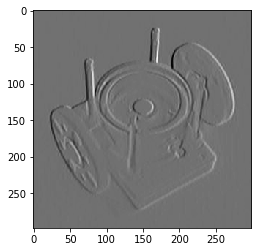

In [108]:
ddepth = cv2.CV_64F  # 64-bit float output
dx = 1  # First-order derivative in x-direction
dy = 0  # NO derivative in y-direction
sobelx = cv2.Sobel(input_image, ddepth, dx, dy)

plt.imshow(sobelx, cmap='gray')

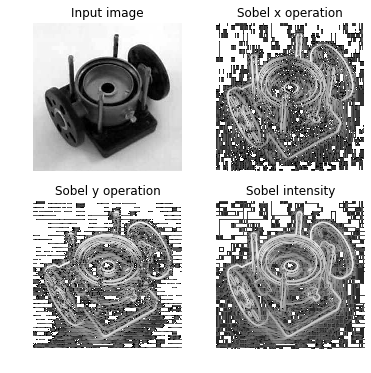

In [111]:
# sobel operations and its magnitudes
sobelx = cv2.Sobel(input_image, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(input_image, cv2.CV_64F, 0, 1)
sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))

plt.figure(figsize=(6, 6));
plt.subplot(2, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(input_image, cmap='gray');
plt.subplot(2, 2, 2); plt.title('Sobel x operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobelx, 0.0), cmap='gray',norm=LogNorm())
plt.subplot(2, 2, 3); plt.title('Sobel y operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobely, 0.0), cmap='gray',norm=LogNorm());
plt.subplot(2, 2, 4); plt.title('Sobel intensity'); plt.axis('off');
plt.imshow(sobel, cmap='gray',norm=LogNorm());

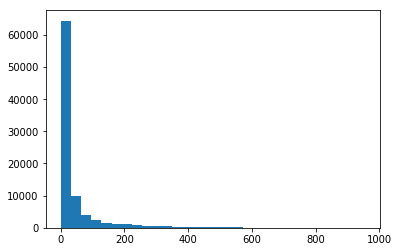

In [115]:
plt.hist(sobel.reshape(-1),30);

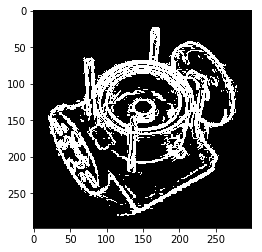

In [121]:
plt.imshow(sobel>50, cmap='gray');

## 2. Canny Edge Detection

`edges = cv2.Canny(image, threshold1, threshold2, apatureSize=3, L2gradient=False)`

- `image`: 8-bit grayscale input image
- `threshold1`/`threshold2`: thresholds for the hysteresis procedure
- `apertureSize`: aperture size for the `Sobel()` operator
- `L2gradient`: A flag. `True` to use $L_2$-norm of gradients. $L_1$-norm for `False`

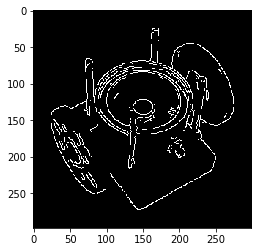

In [122]:
# Canny edge detection
threshold1 = 100
threshold2 = 200
canny = cv2.Canny(input_image, threshold1, threshold2)

plt.imshow(canny, cmap='gray')

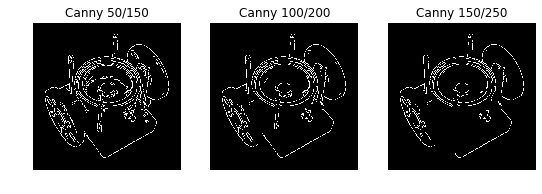

In [123]:
# Edge detections with the various thresholds
canny1 = cv2.Canny(input_image, 50, 150)
canny2 = cv2.Canny(input_image, 100, 200)
canny3 = cv2.Canny(input_image, 150, 250)

plt.figure(figsize=(9, 3));
plt.subplot(1, 3, 1); plt.title('Canny 50/150'); plt.axis('off');
plt.imshow(canny1, cmap='gray');
plt.subplot(1, 3, 2); plt.title('Canny 100/200'); plt.axis('off');
plt.imshow(canny2, cmap='gray');
plt.subplot(1, 3, 3); plt.title('Canny 150/250'); plt.axis('off');
plt.imshow(canny3, cmap='gray');

# Geometric Transformations of Images

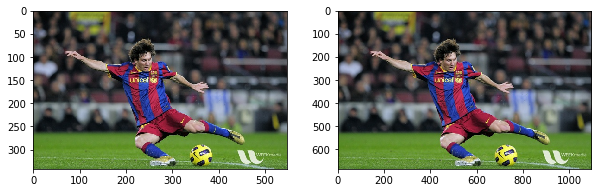

In [124]:
# Scaling
img = cv2.imread('datasets/images/messi.jpg')
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

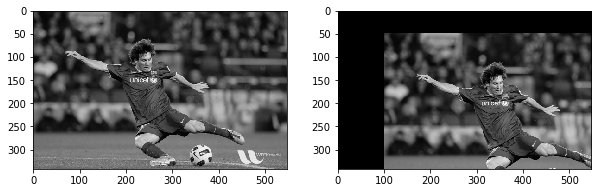

In [22]:
# Translation
img = cv2.imread('datasets/images/messi.jpg', cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')

[[  0.70710678   0.70710678 -40.66251763]
 [ -0.70710678   0.70710678 243.83199846]]


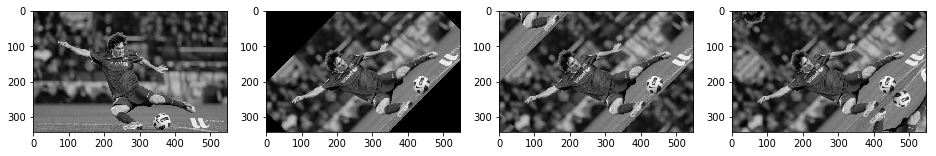

In [125]:
# Rotation
img = cv2.imread('datasets/images/messi.jpg', cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
print (M)
dst1 = cv2.warpAffine(img,M,(cols,rows))
dst2 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_WRAP)
dst3 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_REFLECT)

plt.figure(figsize=(16,3))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(dst1, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(dst2, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(dst3, cmap='gray')

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


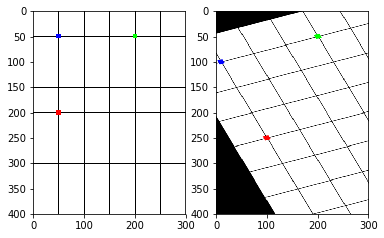

In [126]:
# Affine Transformation
img = cv2.imread('datasets/images/drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
print(M)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

[[ 6.87722951e-02 -1.24273581e+00  6.71000000e+02]
 [ 8.66486286e-02  4.83370157e-02  3.14000000e+02]
 [-7.63013127e-04 -3.68781623e-04  1.00000000e+00]]


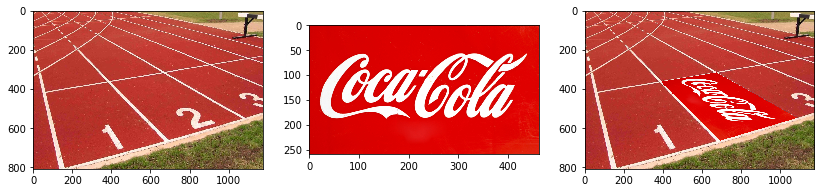

In [127]:
# Homography(Perspective Transformation)
img1 = cv2.imread('datasets/images/track.jpg')
img2 = cv2.imread('datasets/images/logo.jpg')
rows1,cols1,ch1 = img1.shape
rows2,cols2,ch2 = img2.shape

pts1 = np.float32([(0,0),(cols2-1,0),(cols2-1,rows2-1),(0,rows2-1)])
pts2 = np.float32([(671,314),(1084,546),(689,663),(386,361)])

M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
img3 = np.copy(img1)
cv2.warpPerspective(img2,M,(cols1,rows1),img3,borderMode=cv2.BORDER_TRANSPARENT)

plt.figure(figsize=(14,3))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

In [2]:
# Create the haar cascade
cascPath = 'datasets/detect/haarcascade_frontalface_alt.xml'
# cascPath = 'detect/haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascPath)

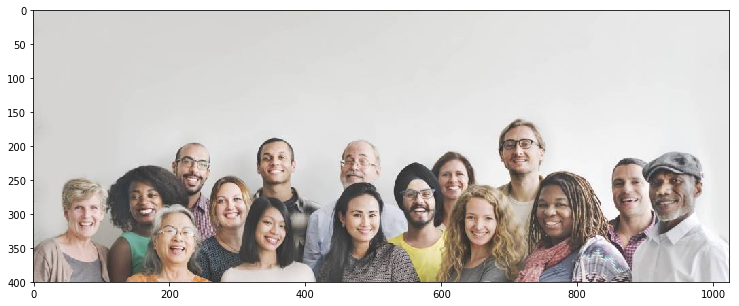

In [6]:
# Read the image
img = cv2.imread('datasets/images/people-to-people.jpg')

fig,ax = plt.subplots(1,1,figsize=(20,5))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
def detect_faces_show(fpath):
    img = cv2.imread(fpath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    print("Found %d faces!" % len(faces))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
    fig,ax = plt.subplots(1,1,figsize=(20,5))
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Found 14 faces!


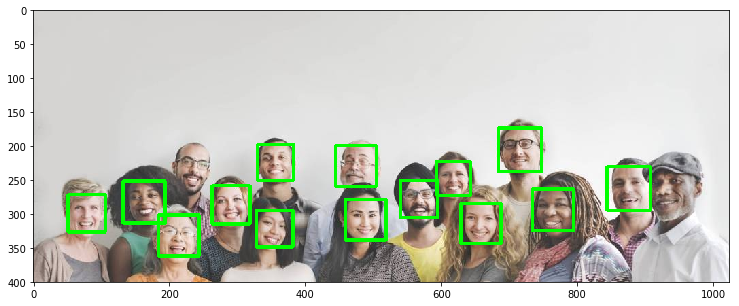

In [8]:
detect_faces_show('datasets/images/people-to-people.jpg')